In [17]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

train_data = pd.read_csv('/kaggle/input/digit-recognizer/train.csv')
test_data = pd.read_csv('/kaggle/input/digit-recognizer/test.csv')

In [18]:
train_data = np.array(train_data)
m, n = train_data.shape
np.random.shuffle(train_data)

test_data = np.array(test_data)
m_test, n_test = test_data.shape


In [19]:
data_val = train_data[0:1000].T
Y_val = data_val[0]
X_val = data_val[1:n]
X_val = X_val / 255.

In [20]:
data_train = train_data[1000:m].T
Y_train = data_train[0]
X_train = data_train[1:n]
X_train = X_train / 255.

In [21]:
X_val.shape

(784, 1000)

In [22]:
Y_val.shape

(1000,)

In [23]:
X_train.shape

(784, 41000)

In [24]:
Y_train.shape

(41000,)

In [23]:
def init_params():
    W1 = np.random.rand(10, 784) - 0.5
    b1 = np.random.rand(10, 1) - 0.5
    W2 = np.random.rand(10, 10) - 0.5
    b2 = np.random.rand(10, 1) - 0.5
    return W1, b1, W2, b2

def ReLU(Z):
    return np.maximum(Z, 0)

def softmax(Z):
    A = np.exp(Z) / sum(np.exp(Z))
    return A
    
def forward_prop(W1, b1, W2, b2, X):
    Z1 = W1.dot(X) + b1
    A1 = ReLU(Z1)
    Z2 = W2.dot(A1) + b2
    A2 = softmax(Z2)
    return Z1, A1, Z2, A2

def ReLU_deriv(Z):
    return Z > 0

def one_hot(Y):
    one_hot_Y = np.zeros((Y.size, Y.max() + 1))
    one_hot_Y[np.arange(Y.size), Y] = 1
    one_hot_Y = one_hot_Y.T
    return one_hot_Y

def backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y):
    one_hot_Y = one_hot(Y)
    dZ2 = A2 - one_hot_Y
    dW2 = 1 / m * dZ2.dot(A1.T)
    db2 = 1 / m * np.sum(dZ2)
    dZ1 = W2.T.dot(dZ2) * ReLU_deriv(Z1)
    dW1 = 1 / m * dZ1.dot(X.T)
    db1 = 1 / m * np.sum(dZ1)
    return dW1, db1, dW2, db2

def update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha):
    W1 = W1 - alpha * dW1
    b1 = b1 - alpha * db1    
    W2 = W2 - alpha * dW2  
    b2 = b2 - alpha * db2    
    return W1, b1, W2, b2

In [24]:
def get_predictions(A2):
    return np.argmax(A2, 0)

def get_accuracy(predictions, Y):
    print(predictions, Y)
    return np.sum(predictions == Y) / Y.size

def gradient_descent(X, Y, alpha, iterations):
    W1, b1, W2, b2 = init_params()
    for i in range(iterations):
        Z1, A1, Z2, A2 = forward_prop(W1, b1, W2, b2, X)
        dW1, db1, dW2, db2 = backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y)
        W1, b1, W2, b2 = update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha)
        if i % 50 == 0:
            print("Iteration: ", i)
            predictions = get_predictions(A2)
            print(get_accuracy(predictions, Y))
    return W1, b1, W2, b2

In [25]:
W1, b1, W2, b2 = gradient_descent(X_train, Y_train, 0.10, 500)

Iteration:  0
[8 3 8 ... 9 2 8] [0 1 2 ... 5 7 9]
0.11604878048780488
Iteration:  50
[5 1 2 ... 6 2 4] [0 1 2 ... 5 7 9]
0.5225853658536586
Iteration:  100
[5 1 2 ... 6 2 4] [0 1 2 ... 5 7 9]
0.6587317073170732
Iteration:  150
[5 1 2 ... 6 2 4] [0 1 2 ... 5 7 9]
0.7218780487804878
Iteration:  200
[0 1 2 ... 6 2 9] [0 1 2 ... 5 7 9]
0.7605365853658537
Iteration:  250
[0 1 2 ... 6 2 9] [0 1 2 ... 5 7 9]
0.7869512195121952
Iteration:  300
[0 1 2 ... 6 2 9] [0 1 2 ... 5 7 9]
0.8066829268292683
Iteration:  350
[0 1 2 ... 6 2 7] [0 1 2 ... 5 7 9]
0.8200731707317073
Iteration:  400
[0 1 2 ... 6 2 7] [0 1 2 ... 5 7 9]
0.8304146341463414
Iteration:  450
[0 1 2 ... 6 2 7] [0 1 2 ... 5 7 9]
0.8380975609756097


In [26]:
def make_predictions(X, W1, b1, W2, b2):
    _, _, _, A2 = forward_prop(W1, b1, W2, b2, X)
    predictions = get_predictions(A2)
    return predictions

def test_prediction(index, W1, b1, W2, b2):
    current_image = X_train[:, index, None]
    prediction = make_predictions(X_train[:, index, None], W1, b1, W2, b2)
    label = Y_train[index]
    print("Prediction: ", prediction)
    print("Label: ", label)
    
    current_image = current_image.reshape((28, 28)) * 255
    plt.gray()
    plt.imshow(current_image, interpolation='nearest')
    plt.show()

Prediction:  [0]
Label:  0


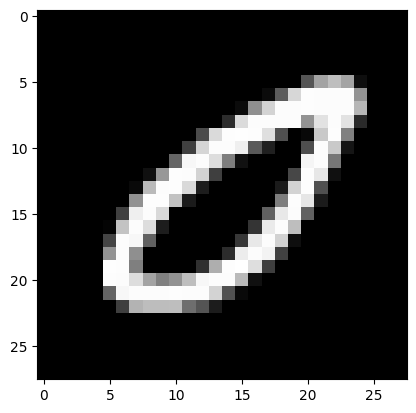

Prediction:  [1]
Label:  1


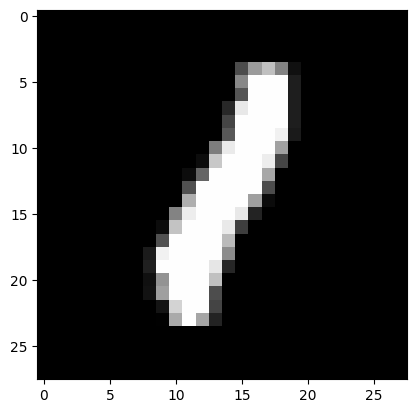

Prediction:  [2]
Label:  2


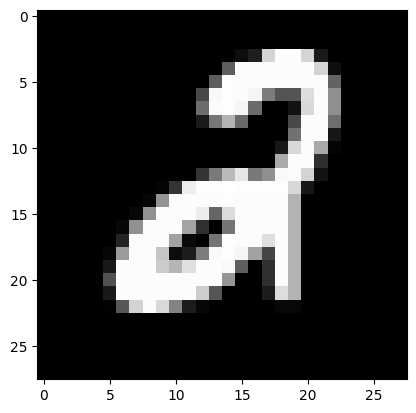

Prediction:  [2]
Label:  2


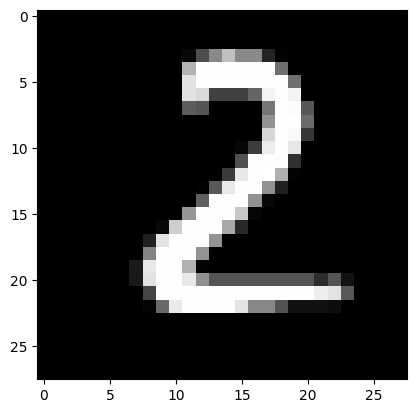

In [30]:
test_prediction(0, W1, b1, W2, b2)
test_prediction(1, W1, b1, W2, b2)
test_prediction(2, W1, b1, W2, b2)
test_prediction(3, W1, b1, W2, b2)

In [28]:
dev_predictions = make_predictions(X_val, W1, b1, W2, b2)
get_accuracy(dev_predictions, Y_val)

[3 9 5 0 8 1 9 1 6 2 1 2 7 8 5 5 8 7 7 4 3 3 5 3 8 6 6 9 3 3 1 6 9 3 7 8 7
 0 7 0 4 4 9 4 1 1 9 5 7 4 0 3 8 3 9 0 3 3 0 0 2 3 3 6 4 8 1 3 9 9 9 4 0 6
 5 9 1 0 7 5 7 1 3 9 9 1 5 7 5 3 5 4 1 5 4 1 6 6 5 6 1 6 3 3 0 8 2 8 4 1 3
 1 0 1 3 4 1 7 9 9 7 1 8 1 8 3 8 9 1 7 8 8 6 7 2 5 8 6 8 9 0 6 6 4 4 0 7 4
 2 0 2 6 6 2 1 3 1 5 4 3 1 7 4 6 8 0 5 3 3 0 2 8 0 1 6 2 2 2 0 9 2 5 2 3 1
 7 6 6 4 1 7 0 5 6 2 3 4 6 4 0 4 2 8 8 6 1 1 3 4 4 6 1 8 1 6 0 8 7 5 4 2 5
 2 1 6 0 8 2 9 0 0 6 2 9 0 7 2 4 2 3 9 9 8 8 4 8 3 9 1 5 6 9 4 4 7 3 5 8 8
 4 6 5 8 0 6 9 4 6 0 7 2 3 3 8 5 6 7 2 9 2 7 6 9 7 4 3 8 6 6 0 9 0 0 0 6 7
 2 5 7 4 4 1 4 3 1 2 7 2 6 3 7 9 2 6 0 3 7 4 1 6 1 8 2 2 8 1 6 3 2 2 9 2 7
 5 1 7 6 6 7 1 4 8 4 9 7 9 5 3 7 2 9 6 6 4 1 0 1 4 6 5 0 0 4 3 6 1 3 1 1 1
 0 0 0 3 3 4 1 1 8 3 2 9 4 8 9 3 9 1 2 4 8 8 5 0 1 3 2 2 3 6 0 9 2 7 0 1 2
 6 9 5 1 9 9 8 1 1 7 8 3 4 0 7 1 9 2 9 8 4 3 4 8 0 1 3 6 9 6 5 6 4 9 4 7 9
 5 7 4 4 1 9 0 6 5 5 5 7 8 9 2 6 5 4 6 3 4 2 6 8 5 0 0 4 3 8 1 1 3 7 7 7 2
 3 2 2 3 6 6 3 9 4 8 2 7 

0.855